In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

#### Loading data

###### calendar.csv - Contains information about the dates on which the products are sold.
###### sales_train_validation.csv - Contains the historical daily unit sales data per product and store [d_1 - d_1913]
###### sell_prices.csv - Contains information about the price of the products sold per store and date.
###### sales_train_evaluation.csv - Includes sales [d_1 - d_1941] (labels used for the Public leaderboard)

In [5]:
#train set
train_data = pd.read_csv('sales_train_evaluation.csv')
train_data

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,1,0,3,0,1,1,0,0,1,1
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,0,0,1,2,0,1,0,1,0,2
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,1,1,4,6,0,1,1,1,0


In [6]:
train_data.shape

(30490, 1947)

In [43]:
#test set
test_data = pd.read_csv('sales_train_validation.csv')
test_data

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [8]:
test_data.shape

(30490, 1919)

In [9]:
#prices dataset
sell_prices = pd.read_csv('sell_prices.csv')
print(sell_prices.info())
print(sell_prices.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB
None
  store_id        item_id  wm_yr_wk  sell_price
0     CA_1  HOBBIES_1_001     11325        9.58
1     CA_1  HOBBIES_1_001     11326        9.58
2     CA_1  HOBBIES_1_001     11327        8.26
3     CA_1  HOBBIES_1_001     11328        8.26
4     CA_1  HOBBIES_1_001     11329        8.26


In [10]:
#checking for NaN values
print(sell_prices.isnull().sum())

store_id      0
item_id       0
wm_yr_wk      0
sell_price    0
dtype: int64


In [11]:
print(sell_prices.describe())

           wm_yr_wk    sell_price
count  6.841121e+06  6.841121e+06
mean   1.138294e+04  4.410952e+00
std    1.486100e+02  3.408814e+00
min    1.110100e+04  1.000000e-02
25%    1.124700e+04  2.180000e+00
50%    1.141100e+04  3.470000e+00
75%    1.151700e+04  5.840000e+00
max    1.162100e+04  1.073200e+02


In [12]:
#dates dataset
calendar = pd.read_csv('calendar.csv')
print(calendar.info())
print(calendar.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB
None
         date  wm_yr_wk    weekday  wday  month  year    d event_name_1  \
0  2011-01-29     11101   Saturday     1      1  2011  d_1          NaN   
1  2011-01-30 

#### Make EDA

In [13]:
#getting information about our datasets
print('Train data describtion: ', train_data.describe)
print('Test data describtion: ', test_data.describe)

Train data describtion:  <bound method NDFrame.describe of                                   id        item_id    dept_id   cat_id  \
0      HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1      HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2      HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3      HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4      HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                              ...            ...        ...      ...   
30485    FOODS_3_823_WI_3_evaluation    FOODS_3_823    FOODS_3    FOODS   
30486    FOODS_3_824_WI_3_evaluation    FOODS_3_824    FOODS_3    FOODS   
30487    FOODS_3_825_WI_3_evaluation    FOODS_3_825    FOODS_3    FOODS   
30488    FOODS_3_826_WI_3_evaluation    FOODS_3_826    FOODS_3    FOODS   
30489    FOODS_3_827_WI_3_evaluation    FOODS_3_827    FOODS_3    FOODS   

      store_id state_id  d_1  d_2  d_3  

In [14]:
#checking if there are null values
print("Null values of train dataset: ")
print(train_data.isnull().sum())

Null values of train dataset: 
id          0
item_id     0
dept_id     0
cat_id      0
store_id    0
           ..
d_1937      0
d_1938      0
d_1939      0
d_1940      0
d_1941      0
Length: 1947, dtype: int64


We got all zeros meaning that there are no null values in our train dataset, so we don't have to think about how to remove them

##### Plotting sales trends over time

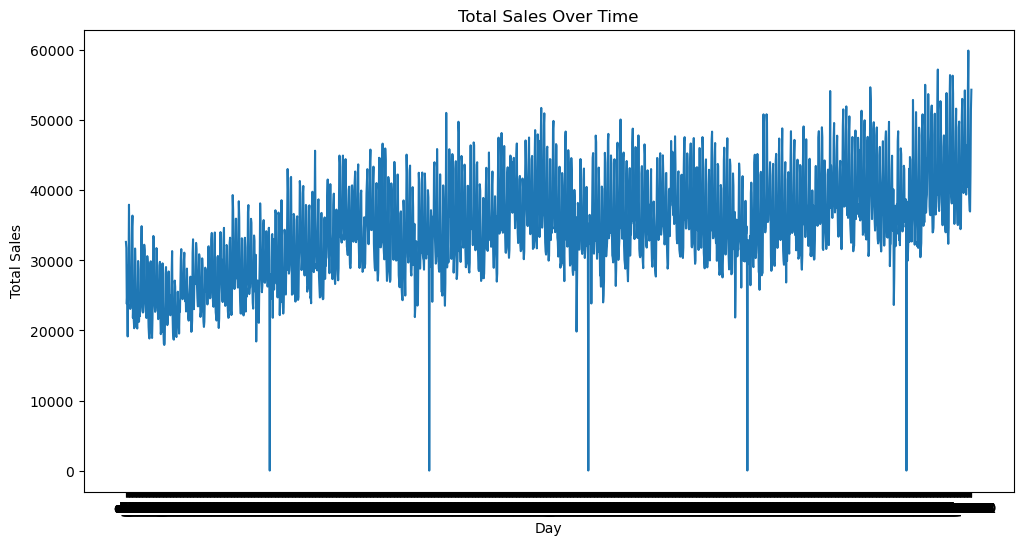

In [12]:
sales_columns = train_data.columns[train_data.columns.str.startswith('d_')]
total_sales = train_data[sales_columns].sum()

plt.figure(figsize=(12, 6))
plt.plot(total_sales)
plt.title('Total Sales Over Time')
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.show()

##### Distribution of sales by product categories

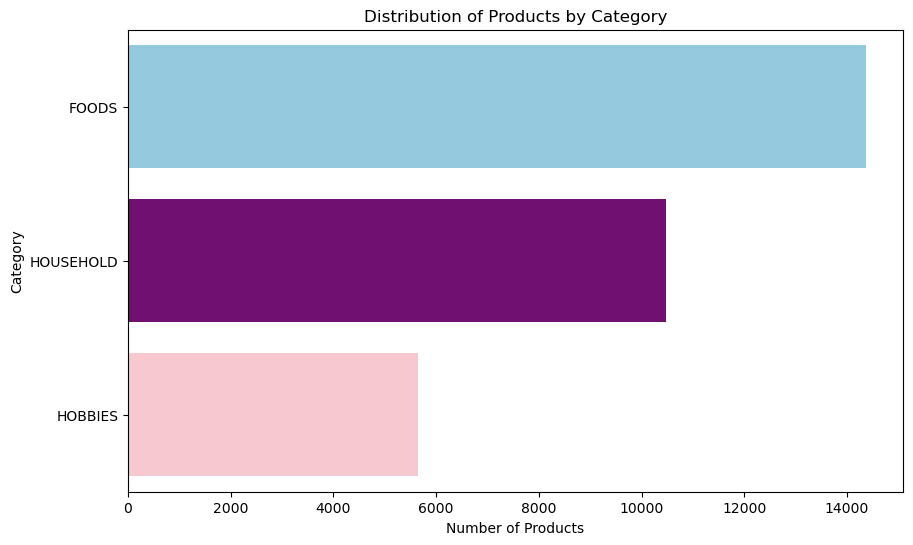

In [13]:
plt.figure(figsize=(10, 6))
colors = ['skyblue', 'purple', 'pink']
sns.countplot(y='cat_id', data=train_data, order=train_data['cat_id'].value_counts().index, palette=colors)
plt.title('Distribution of Products by Category')
plt.xlabel('Number of Products')
plt.ylabel('Category')
plt.show()

#### Distribution of sales by state

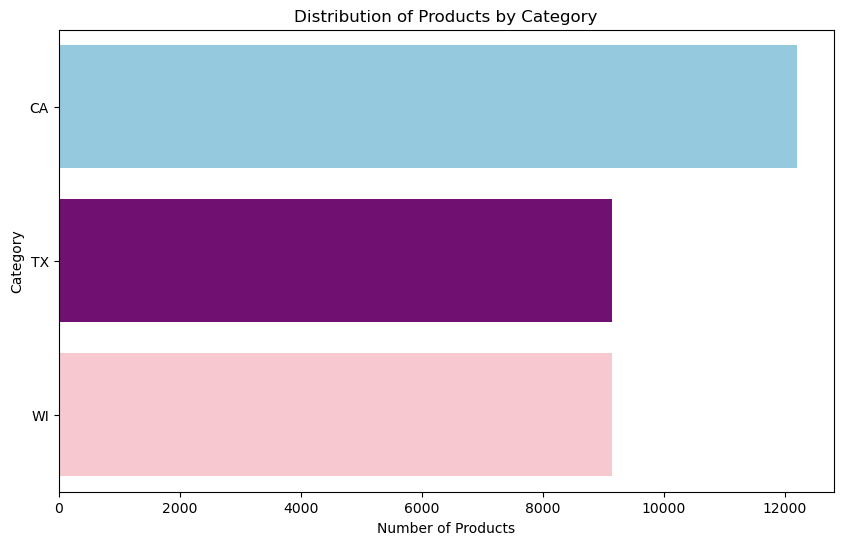

In [14]:
plt.figure(figsize=(10, 6))
colors = ['skyblue', 'purple', 'pink']
sns.countplot(y='state_id', data=train_data, order=train_data['state_id'].value_counts().index, palette=colors)
plt.title('Distribution of Products by Category')
plt.xlabel('Number of Products')
plt.ylabel('Category')
plt.show()

#### Analysis of sell_prices dataset

In [13]:
sell_prices

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
...,...,...,...,...
6841116,WI_3,FOODS_3_827,11617,1.00
6841117,WI_3,FOODS_3_827,11618,1.00
6841118,WI_3,FOODS_3_827,11619,1.00
6841119,WI_3,FOODS_3_827,11620,1.00


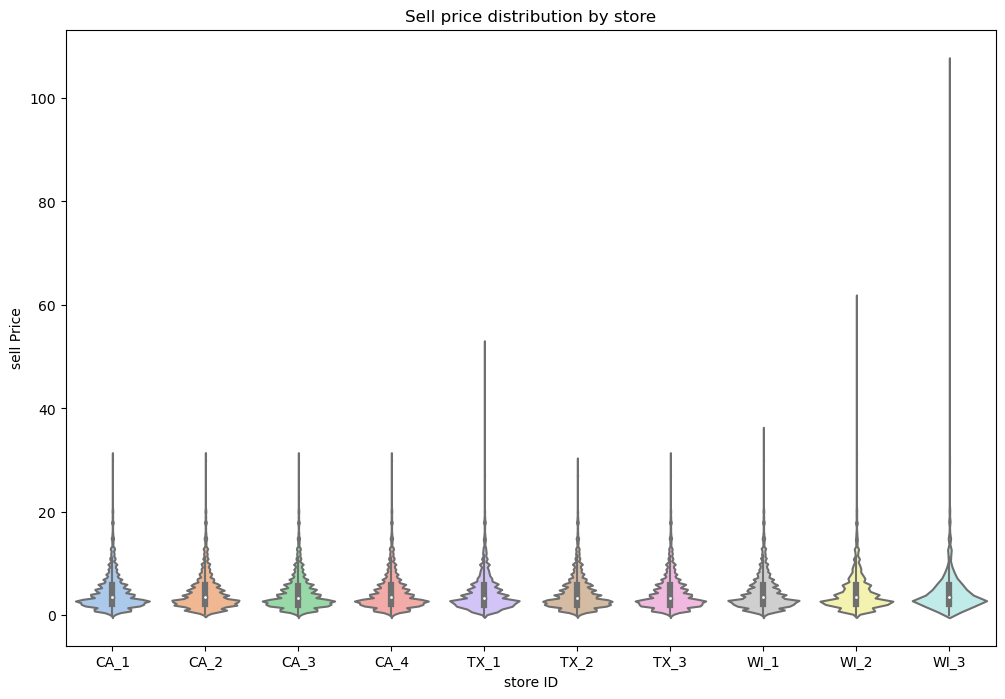

In [16]:
# violin plot of sell prices per store
plt.figure(figsize=(12, 8))
sns.violinplot(x='store_id', y='sell_price', data=sell_prices, palette='pastel')
plt.xlabel('store ID')
plt.ylabel('sell Price')
plt.title('Sell price distribution by store')
plt.show()

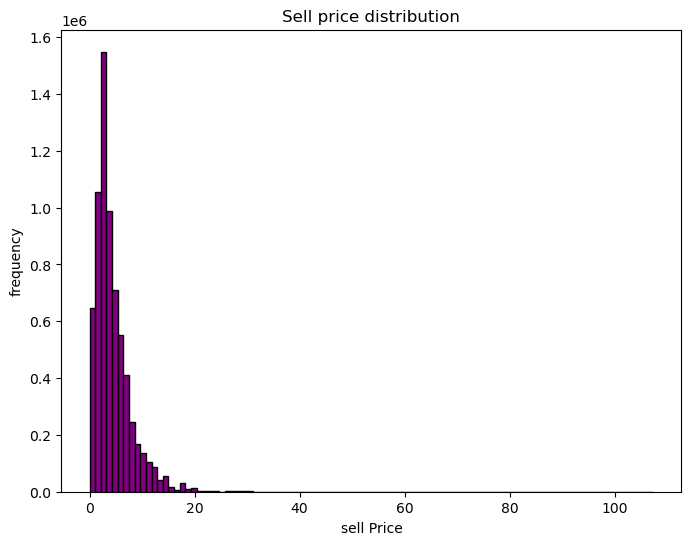

In [17]:
# Histogram of sell prices
plt.figure(figsize=(8, 6))
plt.hist(sell_prices['sell_price'].clip(None, 10000), bins=100, edgecolor='black', color='purple')
plt.xlabel('sell Price')
plt.ylabel('frequency')
plt.title('Sell price distribution')
plt.show()

#### Trends of the sales numbers for each cat_id and store_id

In [60]:
start_range = 1
end_range = 1941
num_columns = end_range - start_range + 1
sales_columns = [f'd_{i}' for i in range(1, num_columns + 1)]  

fig, axes = plt.subplots(len(train_data['store_id'].unique()), 
                         len(train_data['cat_id'].unique()), figsize=(20, 20), sharey=False, color='purple')
for i, store_id in enumerate(train_data['store_id'].unique()):
    for j, cat_id in enumerate(train_data['cat_id'].unique()):
        data_subset = train_data[(train_data['store_id'] == store_id) & (train_data['cat_id'] == cat_id)]
        total_data = data_subset[sales_columns].sum(axis=0) 
        sns.lineplot(x=range(len(total_data)), y=total_data, ax=axes[i, j])
        axes[i, j].set_title(f'store_id: {store_id}, cat_id: {cat_id}')
        axes[i, j].set_xlabel('Time')
        axes[i, j].set_ylabel('Total Value')

plt.tight_layout()
plt.show()

KeyError: 'store_id'

In [13]:
#working with calendar dataset
#checking the amount of NaN values
print(calendar.isnull().sum())

date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d                  0
event_name_1    1807
event_type_1    1807
event_name_2    1964
event_type_2    1964
snap_CA            0
snap_TX            0
snap_WI            0
dtype: int64


As we can see, there are a lot of NaN values in four particular columns, so let's look the information about the unique values in this columns to know what dates are mentioned there

In [15]:
unique_event_name_1 = calendar['event_name_1'].dropna().unique()
unique_event_type_1 = calendar['event_type_1'].dropna().unique()
unique_event_name_2 = calendar['event_name_2'].dropna().unique()
unique_event_type_2 = calendar['event_type_2'].dropna().unique()

uniques = [unique_event_name_1, unique_event_type_1, unique_event_name_2, unique_event_type_2]
for el in uniques:
    print('Unique values: ', el)

Unique values:  ['SuperBowl' 'ValentinesDay' 'PresidentsDay' 'LentStart' 'LentWeek2'
 'StPatricksDay' 'Purim End' 'OrthodoxEaster' 'Pesach End' 'Cinco De Mayo'
 "Mother's day" 'MemorialDay' 'NBAFinalsStart' 'NBAFinalsEnd'
 "Father's day" 'IndependenceDay' 'Ramadan starts' 'Eid al-Fitr'
 'LaborDay' 'ColumbusDay' 'Halloween' 'EidAlAdha' 'VeteransDay'
 'Thanksgiving' 'Christmas' 'Chanukah End' 'NewYear' 'OrthodoxChristmas'
 'MartinLutherKingDay' 'Easter']
Unique values:  ['Sporting' 'Cultural' 'National' 'Religious']
Unique values:  ['Easter' 'Cinco De Mayo' 'OrthodoxEaster' "Father's day"]
Unique values:  ['Cultural' 'Religious']


All the possible uniaue values that are used in 'event_name_2' and 'event_type_2' values are already present in 'event_name_1' and 'event_type_1' columns so for it to make tha dataset more comfortable to work with we can join them into one column;

Also applying one hot encoding for all the unique names in the calendar dataset fo further work with it

In [16]:
calendar = pd.get_dummies(data=calendar, columns=['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'weekday'])
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   date                              1969 non-null   object
 1   wm_yr_wk                          1969 non-null   int64 
 2   wday                              1969 non-null   int64 
 3   month                             1969 non-null   int64 
 4   year                              1969 non-null   int64 
 5   d                                 1969 non-null   object
 6   snap_CA                           1969 non-null   int64 
 7   snap_TX                           1969 non-null   int64 
 8   snap_WI                           1969 non-null   int64 
 9   event_name_1_Chanukah End         1969 non-null   uint8 
 10  event_name_1_Christmas            1969 non-null   uint8 
 11  event_name_1_Cinco De Mayo        1969 non-null   uint8 
 12  event_name_1_Columbu

In [17]:
#uniting the columns
calendar['event_name_Easter'] = calendar[['event_name_1_Easter', 'event_name_2_Easter']].max(axis=1)
calendar['event_name_Cinco De Mayo'] = calendar[['event_name_1_Cinco De Mayo', 'event_name_2_Cinco De Mayo']].max(axis=1)
calendar['event_name_OrthodoxEaster'] = calendar[['event_name_1_OrthodoxEaster', 'event_name_2_OrthodoxEaster']].max(axis=1)
calendar["event_name_Father's day"] = calendar[["event_name_1_Father's day", "event_name_2_Father's day"]].max(axis=1)

calendar['event_type_Cultural'] = calendar[['event_type_1_Cultural', 'event_type_2_Cultural']].max(axis=1)
calendar['event_type_Religious'] = calendar[['event_type_1_Religious', 'event_type_2_Religious']].max(axis=1)

In [18]:
#dropping old unnessesary columns
calendar = calendar.drop(columns=["event_name_1_Father's day", "event_name_2_Father's day", 'event_name_1_Cinco De Mayo', 'event_name_2_Cinco De Mayo',
                         'event_name_1_Easter', 'event_name_2_Easter', 'event_name_1_OrthodoxEaster', 'event_name_2_OrthodoxEaster',
                         'event_type_1_Cultural', 'event_type_2_Cultural', 'event_type_1_Religious', 'event_type_2_Religious'])

In [19]:
#changing the beginning of every old name
rename_mapping = {col: col.replace('event_name_1_', 'event_name_') for col in calendar.columns if col.startswith('event_name_1_')}
calendar.rename(columns=rename_mapping, inplace=True)

rename_mapping = {col: col.replace('event_type_1_', 'event_type_') for col in calendar.columns if col.startswith('event_type_1_')}
calendar.rename(columns=rename_mapping, inplace=True)

In [20]:
#reducing amount of days to make the enelysis possible due to amount of memory used
days = 390
del_col = []
for x in range(1941-days):
    del_col.append('d_' + str(x+1))
    
train_data = train_data.drop(del_col, axis='columns')

#### Joining data and preparing it to be firred into a model

In [21]:
train_data

,id,item_id,dept_id,cat_id,store_id,state_id,d_1552,d_1553,d_1554,d_1555,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,1,1,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,1,0,1,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,1,2,1,6,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,2,0,2,3,...,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,0,3,0,1,1,0,0,1,1
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,1,1,0,2,...,0,0,1,2,0,1,0,1,0,2
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,1,1,4,6,0,1,1,1,0


In [22]:
calendar

,date,wm_yr_wk,wday,month,year,d,snap_CA,snap_TX,snap_WI,event_name_Chanukah End,...,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,event_name_Easter,event_name_Cinco De Mayo,event_name_OrthodoxEaster,event_name_Father's day,event_type_Cultural,event_type_Religious
0,2011-01-29,11101,1,1,2011,d_1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2011-01-30,11101,2,1,2011,d_2,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2011-01-31,11101,3,1,2011,d_3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2011-02-01,11101,4,2,2011,d_4,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2011-02-02,11101,5,2,2011,d_5,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,5,6,2016,d_1965,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
1965,2016-06-16,11620,6,6,2016,d_1966,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1966,2016-06-17,11620,7,6,2016,d_1967,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1967,2016-06-18,11621,1,6,2016,d_1968,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Calendar and sell_prices datasets and information they contain may also be very usefull in predicting the prices we need, so we have to take them into consideration and add to our train data. To unite train_data and calendar data (merge them) the have to have the common column. The common values they have are 'd' values, so we'll reorganize data to unite this two datasets.

In [23]:
#train_copy = train_data.copy()
train_data = train_data.melt(['id','item_id','dept_id','cat_id','store_id','state_id'], var_name='d', value_name='val')

In [24]:
train_data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,val
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1552,0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1552,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1552,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1552,1
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1552,2


In [25]:
#merging
train_data = pd.merge(train_data, calendar, how='left', on='d')

In [26]:
train_data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,val,date,wm_yr_wk,...,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,event_name_Easter,event_name_Cinco De Mayo,event_name_OrthodoxEaster,event_name_Father's day,event_type_Cultural,event_type_Religious
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1552,0,2015-04-29,11513,...,0,0,0,1,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1552,0,2015-04-29,11513,...,0,0,0,1,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1552,0,2015-04-29,11513,...,0,0,0,1,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1552,1,2015-04-29,11513,...,0,0,0,1,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1552,2,2015-04-29,11513,...,0,0,0,1,0,0,0,0,0,0


In [27]:
train_data = pd.merge(train_data, sell_prices, how='left', on=['item_id', 'wm_yr_wk', 'store_id'])

In [28]:
train_data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,val,date,wm_yr_wk,...,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,event_name_Easter,event_name_Cinco De Mayo,event_name_OrthodoxEaster,event_name_Father's day,event_type_Cultural,event_type_Religious,sell_price
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1552,0,2015-04-29,11513,...,0,0,1,0,0,0,0,0,0,8.26
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1552,0,2015-04-29,11513,...,0,0,1,0,0,0,0,0,0,3.97
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1552,0,2015-04-29,11513,...,0,0,1,0,0,0,0,0,0,2.97
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1552,1,2015-04-29,11513,...,0,0,1,0,0,0,0,0,0,4.64
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1552,2,2015-04-29,11513,...,0,0,1,0,0,0,0,0,0,2.88


In [29]:
#encoding rest of the features
train_data = pd.get_dummies(data=train_data, columns=['dept_id', 'cat_id', 'store_id', 'state_id'])

In [30]:
train_data

,id,item_id,d,val,date,wm_yr_wk,wday,month,year,snap_CA,...,store_id_CA_4,store_id_TX_1,store_id_TX_2,store_id_TX_3,store_id_WI_1,store_id_WI_2,store_id_WI_3,state_id_CA,state_id_TX,state_id_WI
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,d_1552,0,2015-04-29,11513,5,4,2015,0,...,0,0,0,0,0,0,0,1,0,0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,d_1552,0,2015-04-29,11513,5,4,2015,0,...,0,0,0,0,0,0,0,1,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,d_1552,0,2015-04-29,11513,5,4,2015,0,...,0,0,0,0,0,0,0,1,0,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,d_1552,1,2015-04-29,11513,5,4,2015,0,...,0,0,0,0,0,0,0,1,0,0
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,d_1552,2,2015-04-29,11513,5,4,2015,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11891095,FOODS_3_823_WI_3_evaluation,FOODS_3_823,d_1941,1,2016-05-22,11617,2,5,2016,0,...,0,0,0,0,0,0,1,0,0,1
11891096,FOODS_3_824_WI_3_evaluation,FOODS_3_824,d_1941,0,2016-05-22,11617,2,5,2016,0,...,0,0,0,0,0,0,1,0,0,1
11891097,FOODS_3_825_WI_3_evaluation,FOODS_3_825,d_1941,2,2016-05-22,11617,2,5,2016,0,...,0,0,0,0,0,0,1,0,0,1
11891098,FOODS_3_826_WI_3_evaluation,FOODS_3_826,d_1941,0,2016-05-22,11617,2,5,2016,0,...,0,0,0,0,0,0,1,0,0,1


##### Working with test data

In [44]:
#reducing amount of days to make the enelysis possible due to amount of memory used
days = 361
del_col = []
for x in range(1913-days):
    del_col.append('d_' + str(x+1))
    
test_data = test_data.drop(del_col, axis='columns')

In [46]:
#preparing test data
test_data = test_data.melt(['id','item_id','dept_id','cat_id','store_id','state_id'], var_name='d', value_name='val')

In [47]:
test_data

,id,item_id,dept_id,cat_id,store_id,state_id,d,val
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1553,0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1553,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1553,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1553,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1553,0
...,...,...,...,...,...,...,...,...
11006885,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,d_1913,1
11006886,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,d_1913,0
11006887,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,d_1913,0
11006888,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,d_1913,3


In [48]:
test_data = pd.merge(test_data, calendar, how='left', on='d')

In [49]:
test_data = pd.merge(test_data, sell_prices, how='left', on=['item_id', 'wm_yr_wk', 'store_id'])

In [50]:
test_data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,val,date,wm_yr_wk,...,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,event_name_Easter,event_name_Cinco De Mayo,event_name_OrthodoxEaster,event_name_Father's day,event_type_Cultural,event_type_Religious,sell_price
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1553,0,2015-04-30,11513,...,1,0,0,0,0,0,0,0,0,8.26
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1553,0,2015-04-30,11513,...,1,0,0,0,0,0,0,0,0,3.97
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1553,1,2015-04-30,11513,...,1,0,0,0,0,0,0,0,0,2.97
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1553,2,2015-04-30,11513,...,1,0,0,0,0,0,0,0,0,4.64
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1553,0,2015-04-30,11513,...,1,0,0,0,0,0,0,0,0,2.88


In [51]:
test_data = pd.get_dummies(data=test_data, columns=['dept_id', 'cat_id', 'store_id', 'state_id'])

In [52]:
exclude_cols = ['id', 'item_id', 'd', 'date', 'wm_yr_wk', 'wday']
feature_cols = [col for col in test_data.columns if col not in exclude_cols]
X_test = test_data[feature_cols]
X_test = X_test.drop(columns=['val'])
y_true = test_data['val']

In [53]:
X_test.head()

,month,year,snap_CA,snap_TX,snap_WI,event_name_Chanukah End,event_name_Christmas,event_name_ColumbusDay,event_name_Eid al-Fitr,event_name_EidAlAdha,...,store_id_CA_4,store_id_TX_1,store_id_TX_2,store_id_TX_3,store_id_WI_1,store_id_WI_2,store_id_WI_3,state_id_CA,state_id_TX,state_id_WI
0,4,2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,4,2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,4,2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [33]:
feature_cols = [col for col in train_data.columns if col not in exclude_cols]
y_train = train_data['val']
X_train = train_data[feature_cols]
X_train = X_train.drop(columns=['val'])

In [34]:
X_train.head()

,month,year,snap_CA,snap_TX,snap_WI,event_name_Chanukah End,event_name_Christmas,event_name_ColumbusDay,event_name_Eid al-Fitr,event_name_EidAlAdha,...,store_id_CA_4,store_id_TX_1,store_id_TX_2,store_id_TX_3,store_id_WI_1,store_id_WI_2,store_id_WI_3,state_id_CA,state_id_TX,state_id_WI
0,4,2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,4,2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,4,2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Choosing method to make predictions

The task is to predict item sales at stores in various locations for two 28-day time periods. 
In my opinion there may be several pretty efficient methods which may be used in this case:

    1) One of statistical methods used to work with time series(models like ARIMA, for example), because the dataset we use is a certain number os time series: each its line may be considered a time series. Moreover, looking at some of the plots which were built earlier, it is seen that seasonality and trends are present => models like ARIMA are particularly effective for stationary time series data and can handle seasonality and trends. But it may be problematic to use this method because of the way our data represented
    
    2) Gradient Boosting: 
    XGBoost offers several advantages that make it an excellent choice for time-series forecasting:
        - handling non-linear relationships: XGBoost can capture complex non-linear relationships between input features and the target variable, making it suitable for time-series data with intricate patterns.
        - feature importance: XGBoost provides insights into the importance of different features, allowing to identify the most influential factors in the time-series data.
        - regularization: XGBoost incorporates regularization techniques to prevent overfitting, ensuring that the model generalizes well to unseen data.
        - handling missing values and outliers: XGBoost can handle missing values and outliers in the data, reducing the need for extensive data preprocessing.


#### Training model and making predictions

In [35]:
import xgboost
from xgboost import XGBRegressor
model = XGBRegressor()

In [36]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [54]:
y_pred = model.predict(X_test)

In [58]:
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print("RMSE:", rmse)

RMSE: 3.1792147194676565


#### Why do you think the competition uses a Weighted Root Mean Squared Scaled Error?
The majority of the time series in the competition dataset display intermittency, meaning there are sporadic sales including zeros.
Traditional error metrics like Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) might penalize zero values disproportionately and not account for the intermittent nature of the data effectively. Also the M5 Competition dataset includes a large number of time series at different levels of aggregation and Weighted RMSSE scales the errors based on the level of aggregation, allowing for fair comparison across different time series lengths and hierarchies.